In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv('mcdonalds.csv')

In [47]:
df.head()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [48]:
del df['Unnamed: 0']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [50]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [53]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [54]:
df['cheap']

0       Yes
1       Yes
2        No
3       Yes
4       Yes
       ... 
1448     No
1449    Yes
1450     No
1451    Yes
1452     No
Name: cheap, Length: 1453, dtype: object

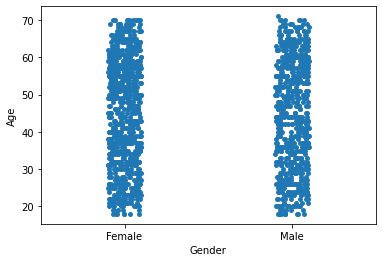

In [57]:
sns.stripplot(x=df['Gender'],y=df['Age'])
plt.show()

In [58]:
df['Like'] = df['Like'].replace({'I love it!+5':'+5','I hate it!-5':'-5'})

In [61]:
df.Like.value_counts()

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

/var/folders/w0/dpb6t7597l3crlwkyy9lr6hw0000gn/T/ipykernel_1431/4247218809.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,orient="v", height=5, aspect=2, palette="Set2",kind="swarm")


Text(0.5, 1.0, 'Likelyness of McDonald w.r.t Age')

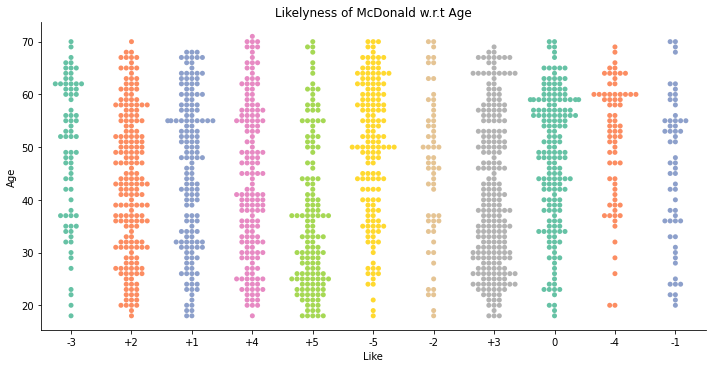

In [68]:
sns.catplot(x="Like", y="Age",data=df,orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')

In [70]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)

In [71]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


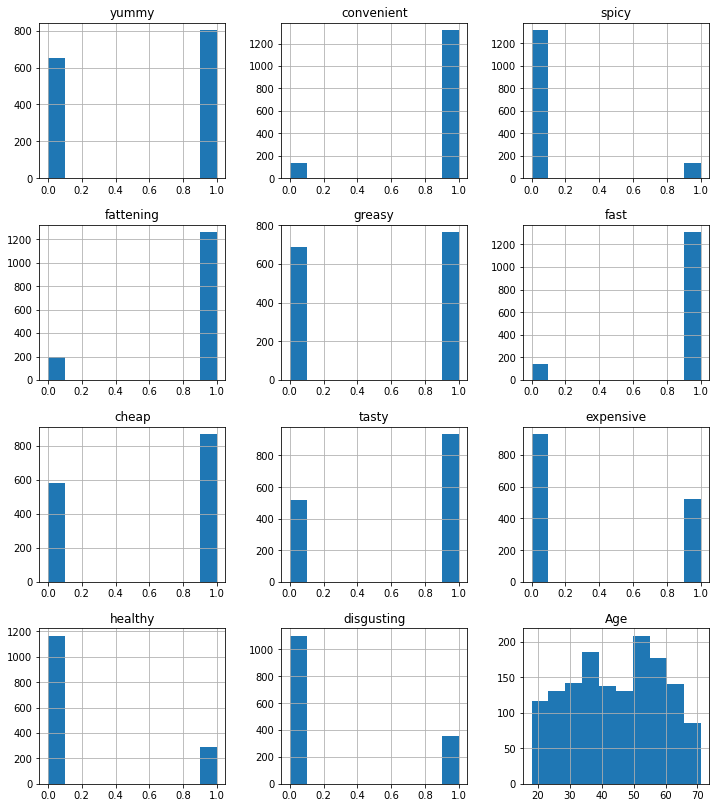

In [77]:
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [79]:
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [80]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [82]:

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [84]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


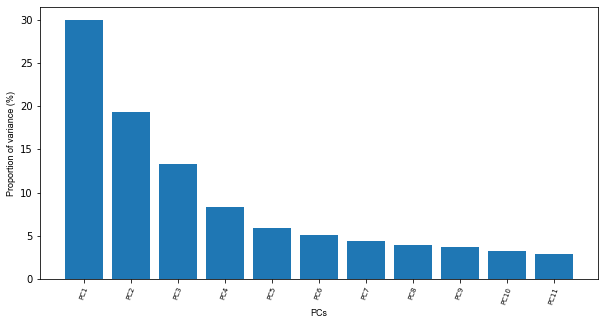

In [85]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

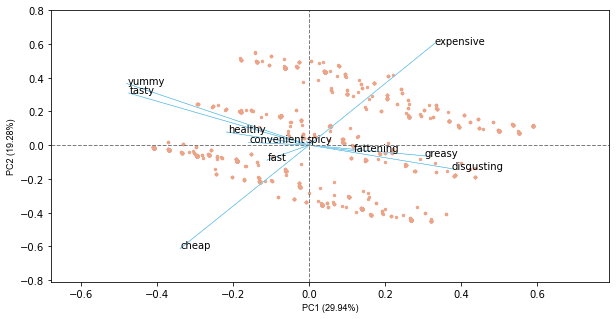

In [86]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

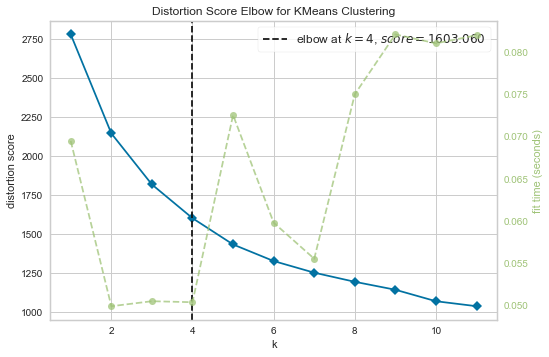

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [91]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_) 
print(kmeans.cluster_centers_) 

[1 2 2 ... 2 3 0]
1603.3394119101072
7
[[0.02057613 0.67489712 0.08230453 0.91769547 0.70781893 0.74897119
  0.06584362 0.09465021 0.89300412 0.0617284  0.72427984]
 [0.02272727 0.89285714 0.07467532 0.92532468 0.66233766 0.9512987
  0.92207792 0.1525974  0.01298701 0.07142857 0.38311688]
 [0.85227273 0.96875    0.12784091 0.90625    0.5625     0.86363636
  0.10511364 0.92613636 0.82670455 0.19034091 0.09943182]
 [0.89272727 0.98       0.08727273 0.78727273 0.34727273 0.96181818
  0.96909091 0.98181818 0.01454545 0.33636364 0.04363636]]


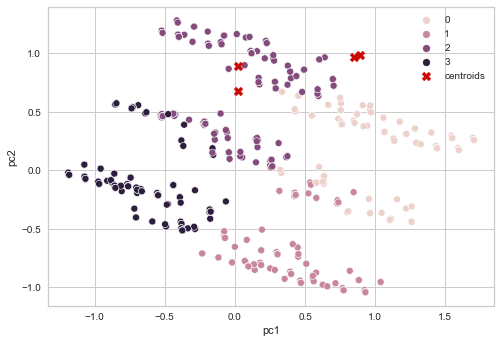

In [92]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()